# Main program GAIA-NIR

## Purpose

The main program handles the overall simulation flow by calling methods from the Spectrum and Parameters classes.\
The Spectrum class encapsulates all spectrum-related operations, including loading, processing, and saving the spectrum. \
The Parameters class handles configuration.


## Version History
- **v4.0**: Update: 

- Implemented verbose control for stochastic processes to avoid repetitive print statements when generating multiple spectra.

- Refactored resample and convolve into a single function that dynamically defines the wavelength grid.

- Added spectrum reference function before modifications for consistency in stochastic processing.

- Modified file saving format to include output spectrum numbering (e.g., output_spectrum_001.txt, output_spectrum_002.txt, etc.).


Last Edited: 2025-02-07


## Flowchart of first overview of program

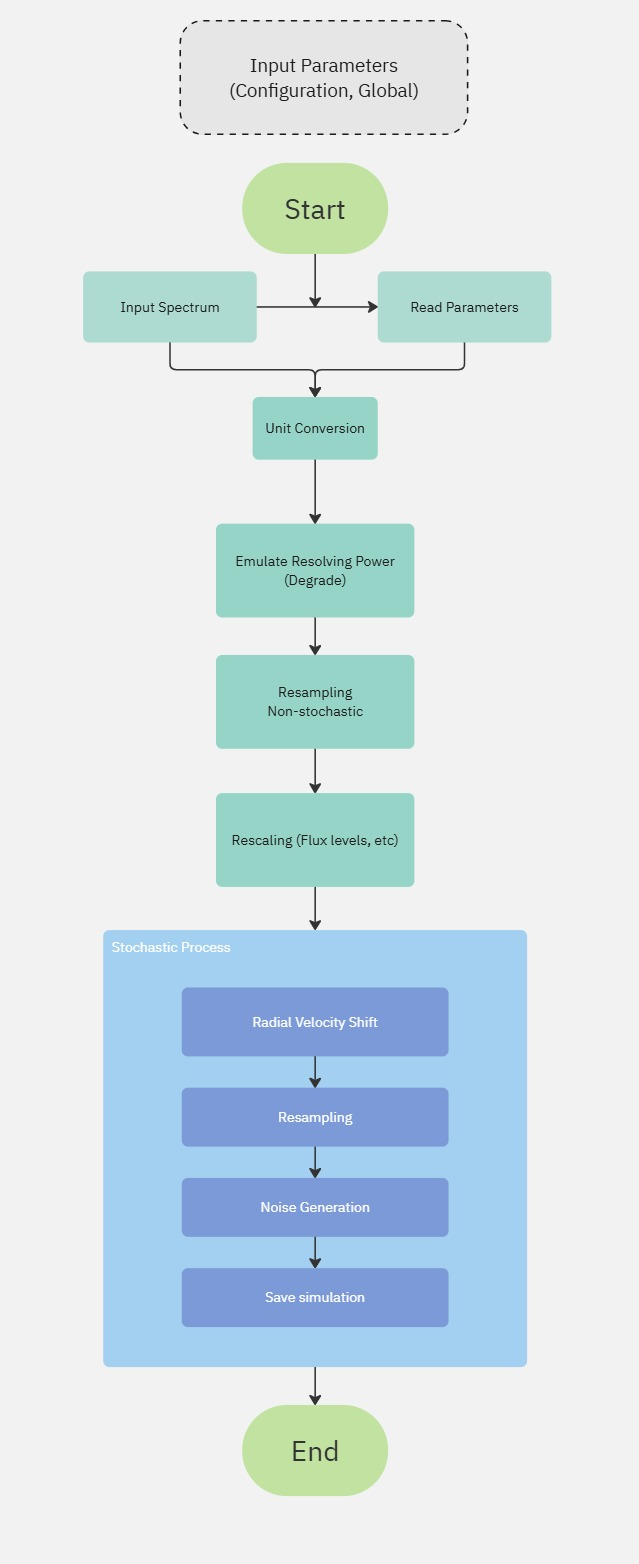

## Skeleton of Main program

2 options. \
-Make the main program into one main function with everything else defined inside it \
-Make multiple functions with the main function calling each of them. I like this approach better to make sure each one works and easier to debug if necessary.

In [1]:
# IMPROT CLASSES OR OTHER NECESSARY FILES
import import_ipynb
import numpy as np
from spectrum import Spectrum
from parameters import Parameters


In [4]:
import os
print(os.getcwd()) 

C:\Users\Mj\Downloads\G_NIR-3.0\G_NIR-3.0


Documents\Internship\GAIA_NIR\gaia_simulation_main

Initializing default parameters
Loading spectrum from gaia_055000450000.txt
Spectrum loaded correctly.
Reference spectrum saved.
Resampling and convolution completed.


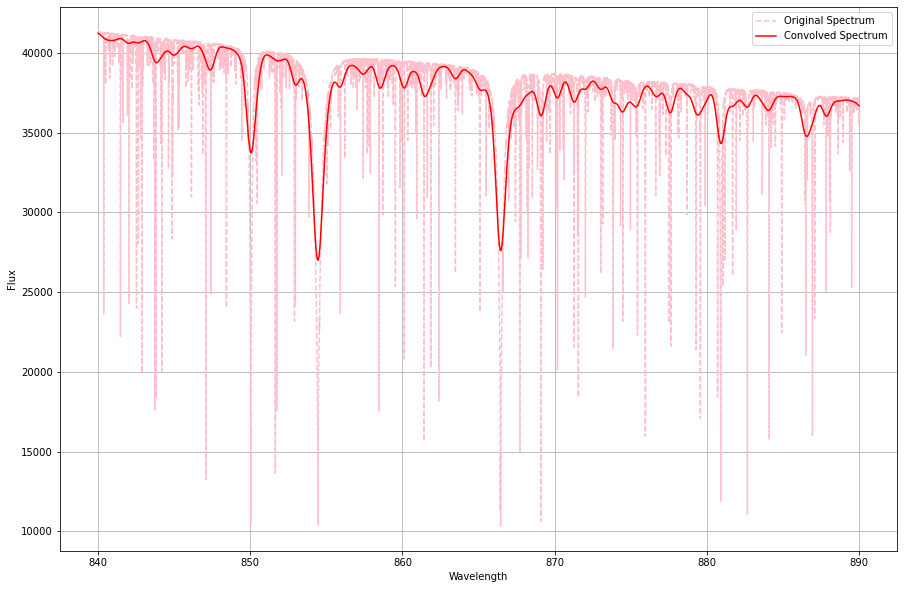

Applying radial velocity shift
Resampling spectrum for stochastic process
Adding noise to spectrum
Saving spectrum to output_spectrum_001.txt
Saving spectrum to output_spectrum_002.txt
Saving spectrum to output_spectrum_003.txt
Simulation complete.


In [2]:
def main():
    """
    Main function to control the simulation flow.
    """
    params = Parameters()
    spectrum = Spectrum()

    # Load spectrum
    spectrum.load_spectrum("gaia_055000450000.txt")

    # Process spectrum: Resample, Convolve, and Plot in a single call
    spectrum.resample_and_convolve().plot_comparison()

    # Stochastic Process Loop
    for i in range(params.num_output_spectra):
        # Print once for test, change to True to print always
        spectrum.radial_velocity_shift(verbose=(i == 0))  
        spectrum.resample_stochastic(verbose=(i == 0))  
        spectrum.generate_noise(verbose=(i == 0))  
        spectrum.save_spectrum(output_file=f"output_spectrum_{i+1:03d}.txt")

    print("Simulation complete.")

if __name__ == "__main__":
    main()

